# Cleaning and analyzing the datas

We prepare and analyze the news that we obtained from the archives in La Presse and Le Journal de Montreal for a text classification training. 

We use the datas that we obtained from the archives as training datas, and the datas that we obtained from the most recent news as test datas. 

We call the relevant libraries. 

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We read the different data sets that we put in csv files. 

In [10]:
df_jdm_recent = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_journal_de_montreal_090620.csv', index_col=0)
df_lp_recent = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_lapresse_090520.csv', index_col=0)
df_lp_archiv = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_lapresse_archives.csv', index_col=0)
df_jdm_archiv = pd.read_csv('/Users/louispht/Documents/git_projects/news_classifier/Data/articles_le_journal_de_montreal_archives.csv', index_col=0)

In [19]:
#Create the training set
df_train = df_lp_archiv.append(df_jdm_archiv).reset_index(drop=True)

In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12402 entries, 0 to 12401
Data columns (total 4 columns):
title       12402 non-null object
content     12402 non-null object
link        12402 non-null object
category    12402 non-null object
dtypes: object(4)
memory usage: 387.7+ KB


In [21]:
df_train.sample(20)

,title,content,link,category
3278,"Panama Papers: certains documents, sans intérê...",Le quotidien allemand qui a été le premier à m...,https://www.lapresse.ca/international/europe/2...,international
11904,Des adieux déchirants et lumineux,"À moins d’avoir le pire des cœurs de pierre, ...",https://www.journaldemontreal.com/2017/10/25/d...,culture
3371,Hillary Clinton refuse un ultime débat avec Be...,La candidate démocrate à la Maison-Blanche Hil...,https://www.lapresse.ca/international/dossiers...,international
1445,"Le PSG s'offre le clasico avec Beckham, Lyon s...","Le Paris SG, leader, s'est offert le clasico d...",https://www.lapresse.ca/sports/soccer/france/2...,sports
10677,"Antti Niemi, une présence rassurante",Privés des services de Carey Price pour une p...,https://www.journaldemontreal.com/2018/03/01/a...,sports
8298,Capture d'un rhinocéros rare à Bornéo,JAKARTA - Des écologistes ont capturé un rhin...,https://www.journaldemontreal.com/2016/03/23/i...,international
7266,Des photos sur Facebook de la police qui l’arrête,L’homme qui aurait mis le feu à une maison à ...,https://www.journaldemontreal.com/2019/03/04/d...,actualites
5479,Canada Goose passe des parkas aux tenues pour ...,L’emblématique fabricant canadien de parkas ha...,https://www.lapresse.ca/affaires/entreprises/2...,affaires
7467,"Ivres, ils perturbent un tournage en quadripor...",Trois hommes d’âge mûr avec les facultés affa...,https://www.journaldemontreal.com/2019/07/28/s...,actualites
10070,Montoya: confiance solidifiée,Lorsqu’un gardien encaisse une raclée de 10...,https://www.journaldemontreal.com/2016/11/13/u...,sports


In [22]:
#Create the test set
df_test = df_lp_recent.append(df_jdm_recent).reset_index(drop=True)

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1476 entries, 0 to 1475
Data columns (total 4 columns):
title       1476 non-null object
content     1476 non-null object
link        1476 non-null object
category    1476 non-null object
dtypes: object(4)
memory usage: 46.2+ KB


In [24]:
df_test.sample(20)

,title,content,link,category
941,Ouverture de la nouvelle coopérative étudiante,Plus de 140 locataires étudiants s’installent ...,https://www.journaldemontreal.com/2020/09/04/o...,actualites
513,Les Twins battent deux fois les Tigers,Marwin Gonzalez a permis à Willians Astudillo ...,https://www.lapresse.ca/sports/baseball/2020-0...,sports
146,Sables bitumineux : les fuites de résidus conf...,Un organisme international de surveillance env...,https://www.lapresse.ca/actualites/environneme...,actualites
191,Afrique: une lueur d’espoir avec la baisse du ...,(Addis Abeba) Le nombre moyen de personnes quo...,https://www.lapresse.ca/international/afrique/...,international
308,Wall Street portée par des valeurs phares de l...,"(New York) La Bourse de New York, entrainée pa...",https://www.lapresse.ca/affaires/marches/2020-...,affaires
323,Acquisition de Cogeco : Rogers veut rassurer l...,Alors que Rogers prévoit acheter tous les acti...,https://www.lapresse.ca/affaires/entreprises/2...,affaires
183,L’Égypte recherche neuf suspects dans une affa...,(Le Caire) Le parquet égyptien a annoncé mercr...,https://www.lapresse.ca/international/afrique/...,international
440,Les Canucks forcent la tenue d’un match décisif,(Edmonton) Thatcher Demko a repoussé les 48 ti...,https://www.lapresse.ca/sports/hockey/2020-09-...,sports
1000,Trump appelle Téhéran à ne pas exécuter un lu...,Le président américain Donald Trump a appelé j...,https://www.journaldemontreal.com/2020/09/03/t...,international
703,Le Met de New York rouvrira au public le 29 août,"(New York) Deux grands musées de New York, le ...",https://www.lapresse.ca/arts/arts-visuels/2020...,culture


In [27]:
# Put all the datas in the same dataframe
df_all = df_train.append(df_test).reset_index(drop=True)

dfs = [df_train, df_test]

In [28]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13878 entries, 0 to 13877
Data columns (total 4 columns):
title       13878 non-null object
content     13878 non-null object
link        13878 non-null object
category    13878 non-null object
dtypes: object(4)
memory usage: 433.8+ KB


In [29]:
#Add names
df_train.name = 'Training Set'
df_test.name = 'Test Set'
df_all.name = 'All Set'

### Data Analysis

#### Number of articles in each category

We check whether our data set is balanced, that is, there are approximately the same amount of articles in each category. 

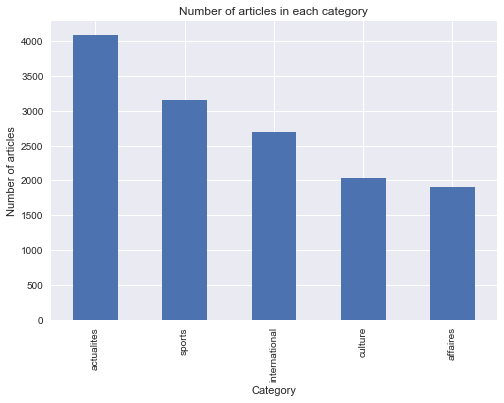

In [39]:
# Draw a vertical bar chart

ax = df_all['category'].value_counts().plot(kind = 'bar', title = 'Number of articles in each category')
ax.set_xlabel('Category')
ax.set_ylabel('Number of articles')

plt.show()

The data set is not perfectly balanced, but it should be ok for our models. We will keep this in mind when we choose our accuracy metrics. 

#### News length

As we will create features involving the key words that appear the most often, it is important that different categories don't have articles with very different length. So we check that. 

In [41]:
df_all['news_length'] = df_all['content'].str.len()

In [42]:
df_all['news_length'].describe()

count    13878.000000
mean      2635.137772
std       1898.076613
min          1.000000
25%       1433.000000
50%       2319.000000
75%       3456.000000
max      72018.000000
Name: news_length, dtype: float64

There is an article with only one character. Let's investigate. We also check for the articles with more than 10000 characters. 

In [58]:
# Dataframe with articles of length less than 100 characters
df_less100 = df_all[df_all['news_length']<100]
len(df_less100)

42

We check them.

In [59]:
df_less100.head(100)

,title,content,link,category,news_length
151,Mon clin d'oeil du lundi 4 juillet 2011,Il faut être prince ou princesse pour pouvoir ...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,87
271,Mon clin d'oeil du mardi 1 février 2011,"«Tasse-toi, Moubarak! J'ai un nom prédestiné p...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,87
945,Mon clin d'oeil du jeudi 5 janvier 2012,Il n'y a pas trop de politique dans le Bye Bye...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,95
1300,Clin d'oeil du dimanche 22 septembre 2013,Bernard Drainville trouverait la présence de J...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,78
1455,Mon clin d'oeil du lundi 25 février 2013,Certains inspecteurs de l'OQLF ne sont pas pas...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,69
1712,Mon clin d'oeil du jeudi 19 septembre 2013,«Je ne connais pas vraiment ce Monsieur Couill...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,67
2044,Mon clin d'oeil du 2 novembre 2014,"«Contrairement à quand il jouait, on dira main...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,94
2284,Mon clin d'oeil du mardi 3 juin 2014,"La priorité du budget, c'est d'être en mesure ...",https://www.lapresse.ca/actualites/le-clin-doe...,actualites,65
2420,Mon clin d'oeil du mardi 7 octobre 2014,Anne Dorval a prouvé qu'on n'est pas couché de...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,75
2587,Mon clin d'oeil du mercredi 8 avril 2015,On dirait que l'ASSÉ va bientôt s'écrire sans ...,https://www.lapresse.ca/actualites/le-clin-doe...,actualites,57


We see that the datas either contain empty articles, or Clins d'oeil or irrelevant datas. We remove them from our dataset.  

In [60]:
df_test['news_length'] = df_test['content'].str.len()
df_test = df_test[df_test['news_length']>50]
df_train['news_length'] = df_train['content'].str.len()
df_train = df_train[df_train['news_length']>50]
df_all = df_all[df_all['news_length']>50]

In [61]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1474 entries, 0 to 1475
Data columns (total 5 columns):
title          1474 non-null object
content        1474 non-null object
link           1474 non-null object
category       1474 non-null object
news_length    1474 non-null int64
dtypes: int64(1), object(4)
memory usage: 69.1+ KB


In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12386 entries, 0 to 12401
Data columns (total 5 columns):
title          12386 non-null object
content        12386 non-null object
link           12386 non-null object
category       12386 non-null object
news_length    12386 non-null int64
dtypes: int64(1), object(4)
memory usage: 580.6+ KB


In [63]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13860 entries, 0 to 13877
Data columns (total 5 columns):
title          13860 non-null object
content        13860 non-null object
link           13860 non-null object
category       13860 non-null object
news_length    13860 non-null int64
dtypes: int64(1), object(4)
memory usage: 649.7+ KB


In [64]:
df_all['news_length'].describe()

count    13860.000000
mean      2638.549206
std       1896.944986
min         53.000000
25%       1435.750000
50%       2320.500000
75%       3458.000000
max      72018.000000
Name: news_length, dtype: float64

We now check the distribution of news length.

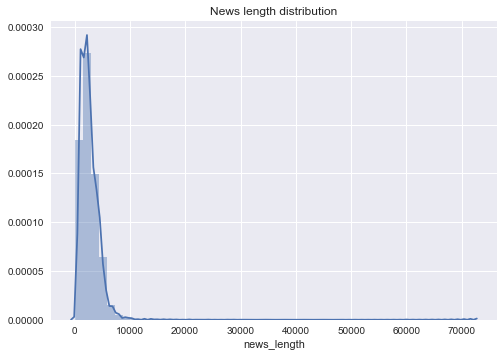

In [65]:
plt.figure()
sns.distplot(df_all['news_length']).set_title('News length distribution');
plt.show()

We see that most datas have less than 10000 characters. We investigate to see what happens with those with more than 10000 characters. 

In [77]:
# Dataframe with articles of length more than 10000 characters
df_more10k = df_all[df_all['news_length']>10000]
len(df_more10k)

62

We check one.

In [78]:
df_more10k['content'].iloc[42]

'Départs massifs\xa0– dont celui de la procureure principale dans l’affaire du vol de données chez Desjardins –, recrutement de procureurs peu expérimentés, délais dans l’attribution de dossiers qui font grincer des dents les policiers\xa0: le Bureau de la grande criminalité et des affaires spéciales semble avoir du mal à prendre son élan depuis sa création à la suite de l’échec des superprocès SharQc. Créé à l’automne 2015, le Bureau de la grande criminalité et des affaires spéciales rassemble les procureurs affectés aux grandes enquêtes contre le crime organisé au Québec. Il devait permettre une plus grande flexibilité dans la lutte de l’État contre les réseaux criminels. Mais les policiers déplorent plutôt des délais qui nuisent à des enquêtes et qui coûtent cher, et des suspects qui filent entre les mailles du filet.  Des procureurs, eux, parlent d’un fleuron un peu flétri par une véritable saignée qui se traduit par le départ de 60 d’entre eux, de problèmes de recrutement et de mi

They just seem to be very long articles. 

We boxplot the news length. 

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


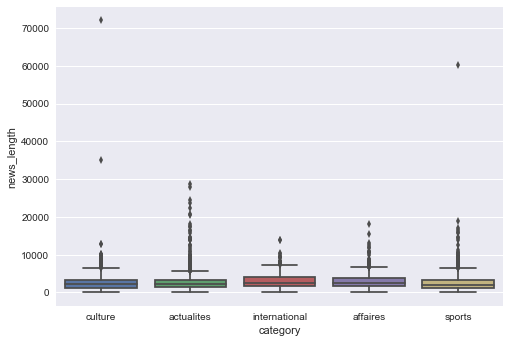

In [79]:
plt.figure()
sns.boxplot(data=df_all, x='category', y='news_length');
plt.show()

We remove the extreme values to get a more readable plot. 

In [80]:
quantile_95 = df_all['news_length'].quantile(0.95)
df_95 = df_all[df_all['news_length'] < quantile_95]

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


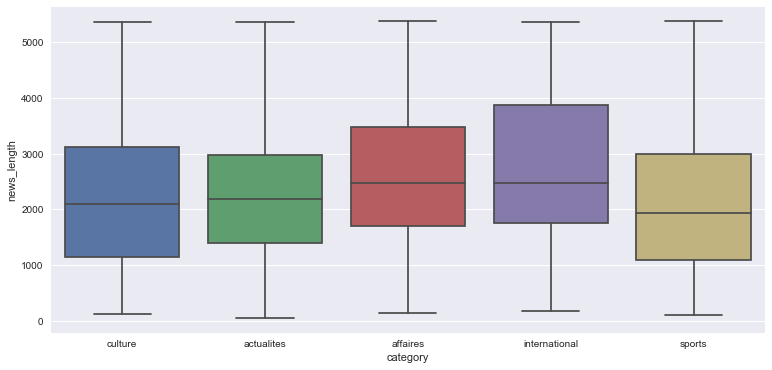

In [84]:
plt.figure(figsize=(12.8,6))
sns.boxplot(data=df_95, x='category', y='news_length');
plt.show()

We see that the length distribution is very similar for each category, so it should not be a problem in our models. We will still normalize the features to avoid that the count of words influence the feature creation process. 

In [85]:
#Make more pretty
#Make sure datas are ok
#Should one remove the extreme values?